In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
import streamlit as st
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import logging
# Ignoring the logging error in jupyter notebook
logging.getLogger('streamlit.runtime.scriptrunner_utils.script_run_context').setLevel(logging.ERROR)
plt.rcParams['figure.figsize'] = (14,8)
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\ExcelR Assignments\Question\Logistic Regression\Logistic Regression\Titanic_train.csv")
data1 = pd.read_csv(r"D:\ExcelR Assignments\Question\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.shape

(891, 12)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
for i in data.columns:
    print(f'Null value percentage of {i} is: {(data[i].isnull().sum()/data.shape[0]) * 100}')

Null value percentage of PassengerId is: 0.0
Null value percentage of Survived is: 0.0
Null value percentage of Pclass is: 0.0
Null value percentage of Name is: 0.0
Null value percentage of Sex is: 0.0
Null value percentage of Age is: 19.865319865319865
Null value percentage of SibSp is: 0.0
Null value percentage of Parch is: 0.0
Null value percentage of Ticket is: 0.0
Null value percentage of Fare is: 0.0
Null value percentage of Cabin is: 77.10437710437711
Null value percentage of Embarked is: 0.22446689113355783


In [8]:
data.drop(['Ticket','Name','Cabin','PassengerId'],axis = 1,inplace = True)

In [9]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
data.dropna(inplace = True)

In [12]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [14]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

<Axes: >

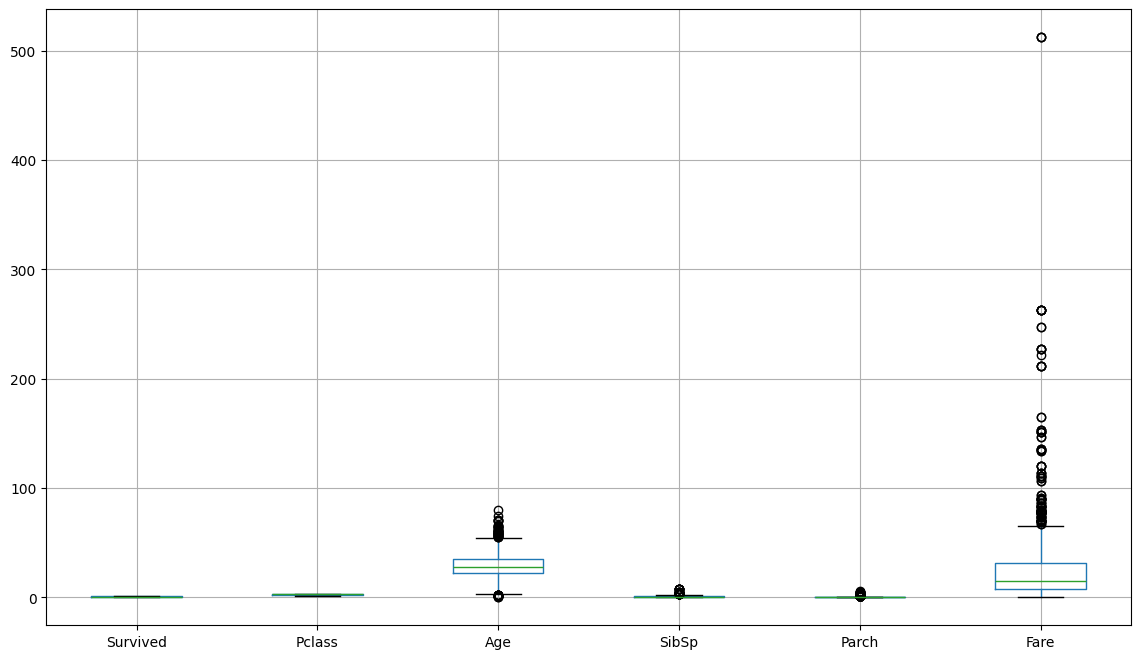

In [15]:
data.boxplot()

In [16]:
# 1. Create the model
iso_forest = IsolationForest(contamination=0.20, random_state=42)

# 2. Fit the model on your features
iso_forest.fit(data.select_dtypes(float, int)) # Select only numerical features

# 3. Predict outliers
# Output: 1 for normal, -1 for outlier
outliers = iso_forest.predict(data.select_dtypes(float, int))

# 4. Filter your data (keep only normal points)
data = data[outliers == 1]


<Axes: >

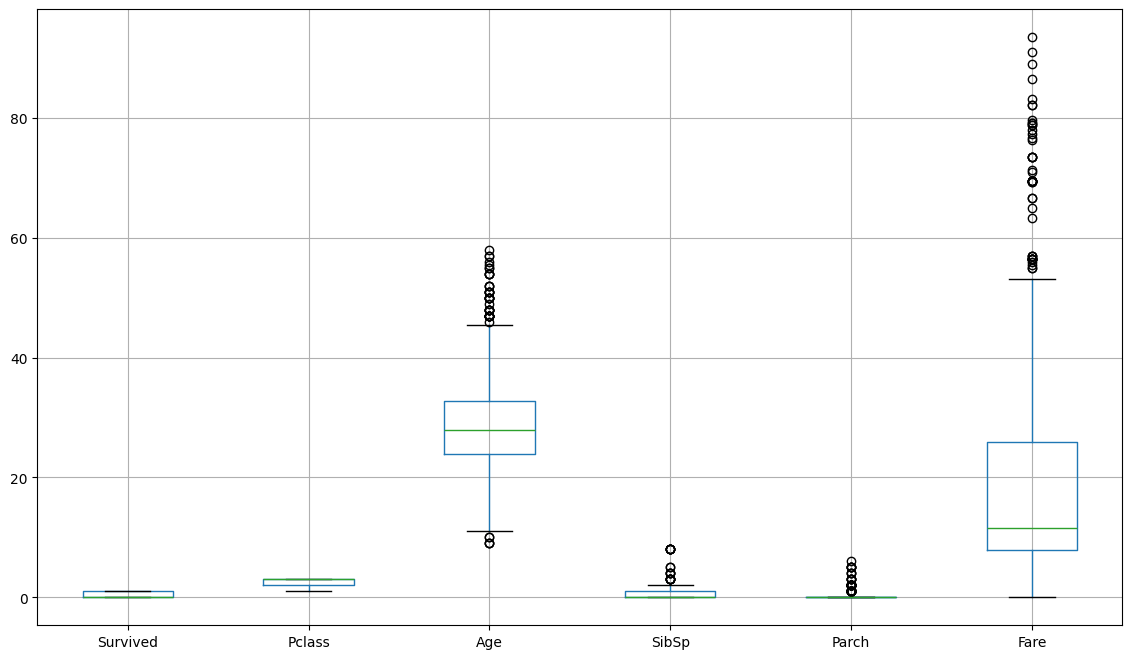

In [17]:
data.boxplot()

<Axes: >

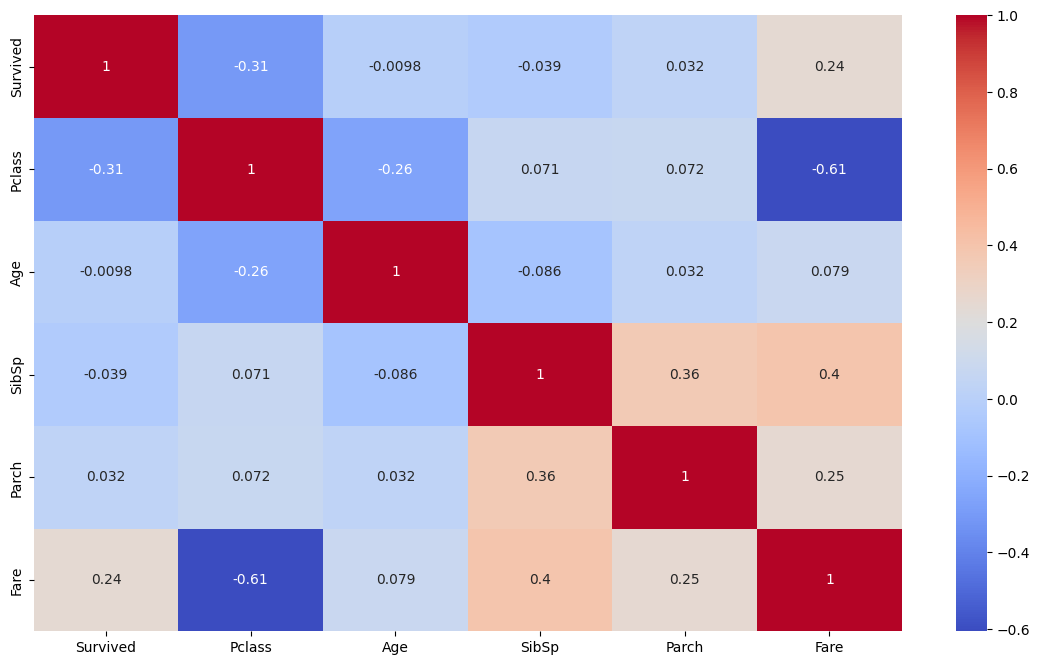

In [18]:
sns.heatmap(data.select_dtypes(include = ['float','int']).corr(), annot = True, cmap = 'coolwarm')

In [19]:
pipe_x = data.iloc[:,1:8]
pipe_y = data[['Survived']]

### Encoding

In [20]:
data = pd.get_dummies(data, columns = ['Embarked','Sex'], drop_first = True).astype(int)

In [21]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22,1,0,7,0,1,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,1,0
3,1,1,35,1,0,53,0,1,0
4,0,3,35,0,0,8,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,0,1,1
887,1,1,19,0,0,30,0,1,0
888,0,3,28,1,2,23,0,1,0
889,1,1,26,0,0,30,0,0,1


In [22]:
sc = StandardScaler()
data[['Age','Fare']] = sc.fit_transform(data[['Age','Fare']])

In [23]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,-0.809063,1,0,-0.662530,0,1,1
1,1,1,1.019648,1,0,2.966669,0,0,0
2,1,3,-0.351886,0,0,-0.662530,0,1,0
3,1,1,0.676765,1,0,1.945957,0,1,0
4,0,3,0.676765,0,0,-0.605824,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,-0.237591,0,0,-0.322292,0,1,1
887,1,1,-1.151947,0,0,0.641714,0,1,0
888,0,3,-0.123297,1,2,0.244770,0,1,0
889,1,1,-0.351886,0,0,0.641714,0,0,1


In [24]:
x = data.iloc[:,1:9]
y = data[['Survived']]
y = y.values.ravel()

In [25]:
logr = LogisticRegression()
logr.fit(x, y)

LogisticRegression()

In [26]:
print(f'Training Accuracy: {logr.score(x, y)}')

Training Accuracy: 0.8129395218002813


### TEST DATA

In [27]:
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
data1.duplicated().sum()

0

In [29]:
data1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
for i in data1.columns:
    print(f'Null value percentage of {i} is: {(data1[i].isnull().sum()/data1.shape[0]) * 100}')

Null value percentage of PassengerId is: 0.0
Null value percentage of Pclass is: 0.0
Null value percentage of Name is: 0.0
Null value percentage of Sex is: 0.0
Null value percentage of Age is: 20.574162679425836
Null value percentage of SibSp is: 0.0
Null value percentage of Parch is: 0.0
Null value percentage of Ticket is: 0.0
Null value percentage of Fare is: 0.23923444976076555
Null value percentage of Cabin is: 78.22966507177034
Null value percentage of Embarked is: 0.0


In [31]:
data1.drop(['Ticket','Name','Cabin','PassengerId'],axis = 1,inplace = True)

In [32]:
data1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


<Axes: >

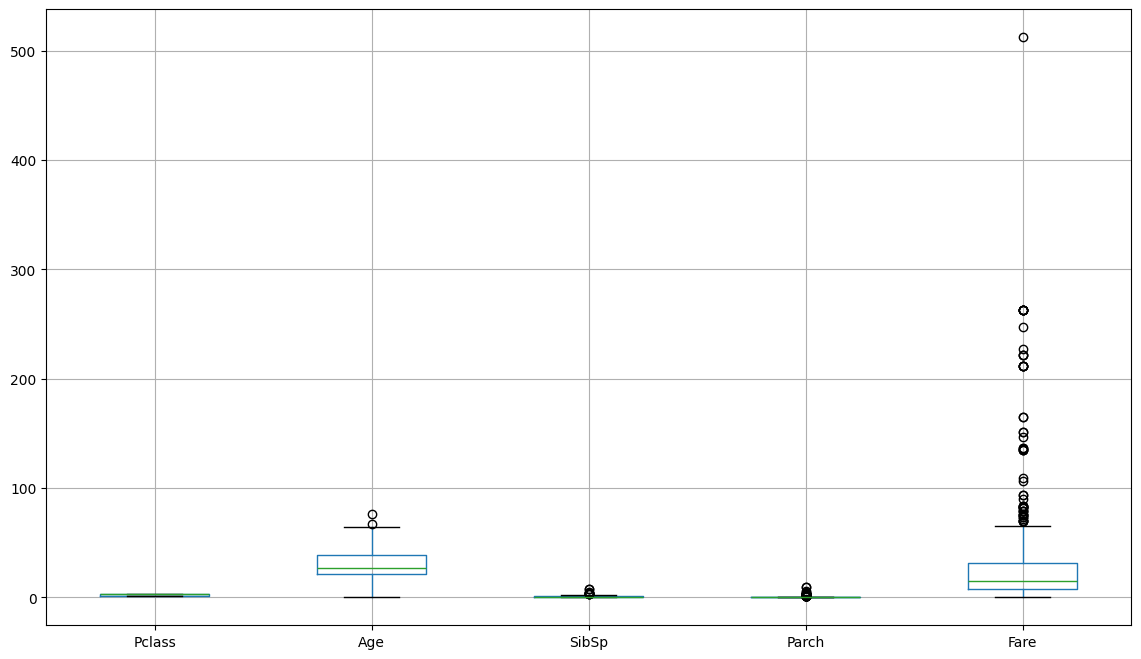

In [33]:
data1.boxplot()

In [34]:
data1['Age'] = data1['Age'].fillna(data1['Age'].median())

In [35]:
data1.dropna(inplace = True)

In [36]:
for i in data1.columns:
    print(f'Null value percentage of {i} is: {(data1[i].isnull().sum()/data1.shape[0]) * 100}')

Null value percentage of Pclass is: 0.0
Null value percentage of Sex is: 0.0
Null value percentage of Age is: 0.0
Null value percentage of SibSp is: 0.0
Null value percentage of Parch is: 0.0
Null value percentage of Fare is: 0.0
Null value percentage of Embarked is: 0.0


In [37]:
data1 = pd.get_dummies(data1, columns = ['Embarked','Sex'], drop_first = True).astype(int)

In [38]:
data1

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34,0,0,7,1,0,1
1,3,47,1,0,7,0,1,0
2,2,62,0,0,9,1,0,1
3,3,27,0,0,8,0,1,1
4,3,22,1,1,12,0,1,0
...,...,...,...,...,...,...,...,...
413,3,27,0,0,8,0,1,1
414,1,39,0,0,108,0,0,0
415,3,38,0,0,7,0,1,1
416,3,27,0,0,8,0,1,1


In [39]:
data1[['Age','Fare']] = sc.transform(data1[['Age','Fare']])

In [40]:
data1

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,0.562470,0,0,-0.662530,1,0,1
1,3,2.048299,1,0,-0.662530,0,1,0
2,2,3.762716,0,0,-0.549117,1,0,1
3,3,-0.237591,0,0,-0.605824,0,1,1
4,3,-0.809063,1,1,-0.378999,0,1,0
...,...,...,...,...,...,...,...,...
413,3,-0.237591,0,0,-0.605824,0,1,1
414,1,1.133943,0,0,5.064800,0,0,0
415,3,1.019648,0,0,-0.662530,0,1,1
416,3,-0.237591,0,0,-0.605824,0,1,1


In [41]:
y_pred = logr.predict(data1)

In [42]:
y_pred.shape

(417,)

In [43]:
y_pre = pd.DataFrame(y_pred)

In [44]:
y_pre

,0
0,0
1,0
2,0
3,0
4,0
...,...
412,0
413,1
414,0
415,0


In [45]:
data1 = data1.reset_index(drop = True)

In [46]:
data1['Survived'] = pd.DataFrame(y_pred)

In [47]:
data1

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Survived
0,3,0.562470,0,0,-0.662530,1,0,1,0
1,3,2.048299,1,0,-0.662530,0,1,0,0
2,2,3.762716,0,0,-0.549117,1,0,1,0
3,3,-0.237591,0,0,-0.605824,0,1,1,0
4,3,-0.809063,1,1,-0.378999,0,1,0,0
...,...,...,...,...,...,...,...,...,...
412,3,-0.237591,0,0,-0.605824,0,1,1,0
413,1,1.133943,0,0,5.064800,0,0,0,1
414,3,1.019648,0,0,-0.662530,0,1,1,0
415,3,-0.237591,0,0,-0.605824,0,1,1,0


In [48]:
data1[['Age','Fare']] = sc.inverse_transform(data1[['Age','Fare']]).astype(int)

In [49]:
data1

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Survived
0,3,34,0,0,7,1,0,1,0
1,3,47,1,0,7,0,1,0,0
2,2,62,0,0,9,1,0,1,0
3,3,27,0,0,8,0,1,1,0
4,3,22,1,1,12,0,1,0,0
...,...,...,...,...,...,...,...,...,...
412,3,27,0,0,8,0,1,1,0
413,1,39,0,0,108,0,0,0,1
414,3,38,0,0,7,0,1,1,0
415,3,27,0,0,8,0,1,1,0


### Creating Pipeline and Saving model to file

In [50]:
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Age', 'Fare']

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

# Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough", # Ignores other column that are not specified 
    force_int_remainder_cols=False,  # To suppress FutureWarning
    verbose_feature_names_out=False   # To suppress verbose feature names
)

# Full pipeline
titanic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

In [51]:
pipe_yy = pipe_y.values.ravel()

In [52]:
titanic_pipeline.fit(pipe_x, pipe_yy)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked'])],
                                   verbose_feature_names_out=False)),
                ('classifier', LogisticRegression())])

In [53]:
print(titanic_pipeline.score(pipe_x, pipe_y.values.ravel())) 
# Same accuracy as first model so, pipeline is perfectly created

0.8115330520393812


In [54]:
model_path = r'E:\Titanic_model.pkl'  # Modify Path as your preference
with open(model_path, 'wb') as file:
    pickle.dump(titanic_pipeline, file)

### Deployment with streamlit

In [55]:
''' Streamlit does not work in jupyter notebook so convert this in python script and give any name 
    to file and then run the command 'streamlit run (file name that you have given.py) '''
with open(r'E:\titanic_model.pkl', 'rb') as file:
    titanic_logr_model = pickle.load(file)
    
def prediction(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    # Model only accepts dataframe not numpy array
    features = pd.DataFrame([{
    'Pclass': Pclass,
    'Sex': Sex,
    'Age': Age,
    'SibSp': SibSp,
    'Parch': Parch,
    'Fare': Fare,
    'Embarked': Embarked
    }])
    preds = titanic_logr_model.predict(features)[0]
    return preds

st.title("Titanic Survival Prediction 🚢")

Pclass = st.selectbox("Passenger Class", [1, 2, 3])
Sex = st.selectbox("Sex", ["male", "female"])
Age = st.slider("Age", 0, 100, 25)
SibSp = st.number_input("Siblings/Spouses Aboard", 0, 10, 0)
Parch = st.number_input("Parents/Children Aboard", 0, 10, 0)
Fare = st.number_input("Fare Paid", min_value=0.0)
Embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

if st.button("Predict Now :mag_right:"):
    pred = prediction(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked)
    st.write(f"Prediction: {'😀 Survived' if pred == 1 else  '💀 Did not survive'}")

2025-05-17 19:03:28.923 
  command:

    streamlit run C:\Users\bhupe\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-17 19:03:28.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 19:03:28.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 19:03:28.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 19:03:28.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 19:03:28.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 19:03:28.936 Session state does not function when running a script without `streamlit run`
2025-05-17 19:03:28.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17

### Interview Questions